In [8]:
from pandas import *
from matplotlib.pyplot import *
from seaborn import *
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.metrics import classification_report,f1_score,accuracy_score
from sklearn.datasets import *
from sklearn.model_selection import *
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.pipeline import Parallel,Pipeline

In [9]:
data = read_csv(r"C:\Users\FAISAL-PC\Downloads\heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


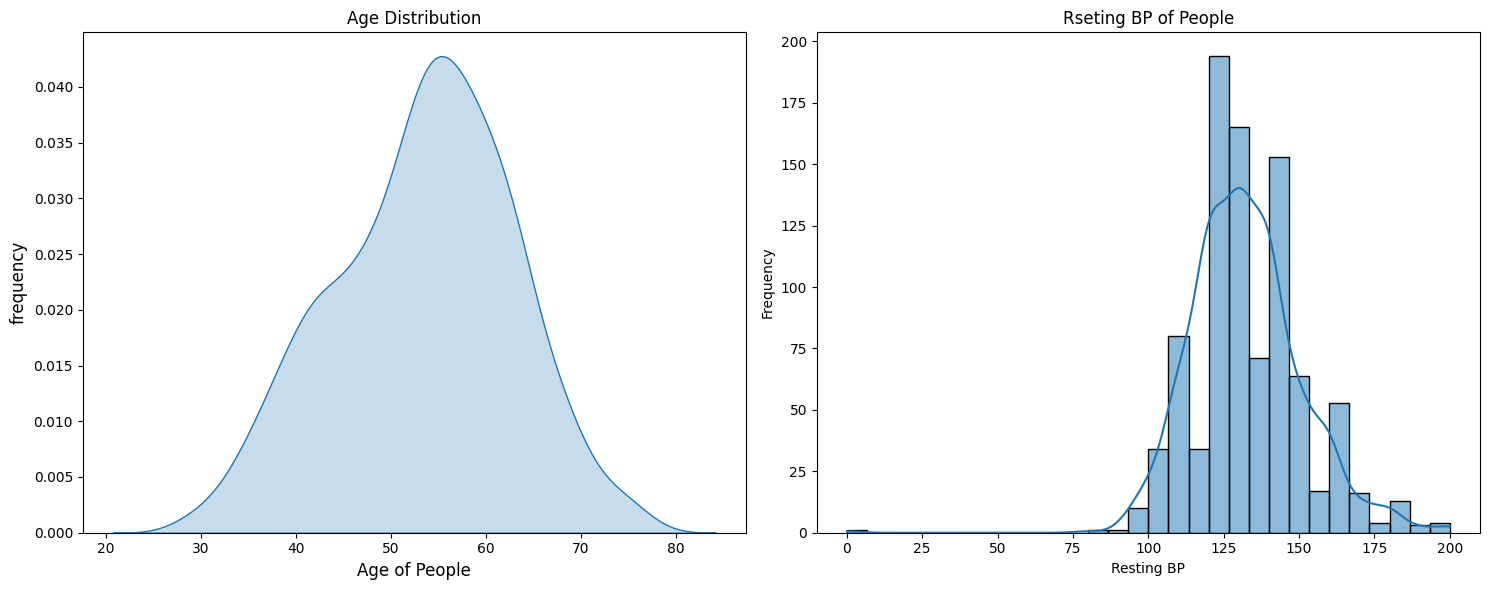

In [10]:
figure(figsize=(15,6))
subplot(1,2,1)
kdeplot(data['Age'],fill=True)
title('Age Distribution')
xlabel('Age of People',fontsize=12)
ylabel('frequency',fontsize=12)
subplot(1,2,2)
histplot(data['RestingBP'],kde=True,bins=30)
title('Rseting BP of People')
xlabel('Resting BP')
ylabel('Frequency')
tight_layout()
show()

In [11]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


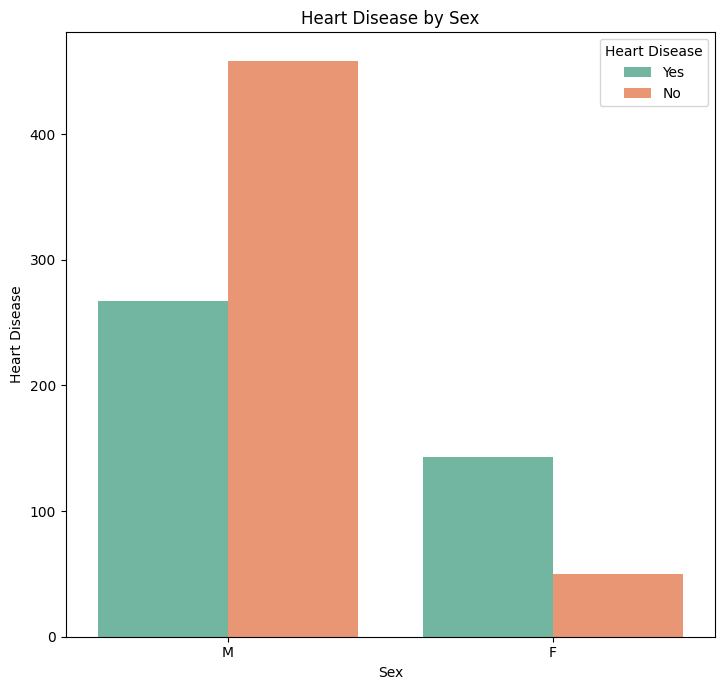

In [12]:
figure(figsize=(14,7))
subplot(1,2,1)
countplot(data=data,x='Sex',hue="HeartDisease",palette='Set2')
xlabel("Sex")
ylabel("Heart Disease")
title('Heart Disease by Sex')
legend(title = 'Heart Disease',labels=['Yes','No'])
tight_layout()
show()

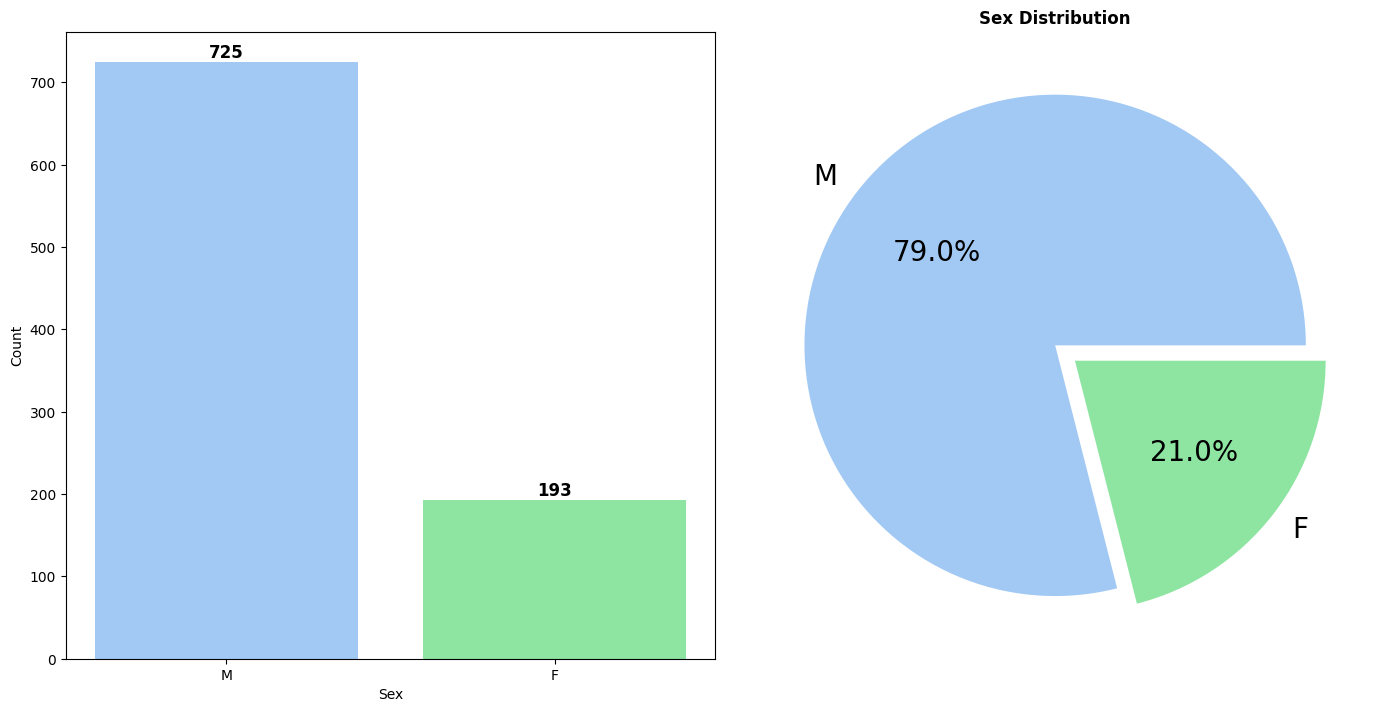

In [13]:
figure(figsize=(14,7))
subplot(1,2,1)
sex_count = data['Sex'].value_counts()
bar = bar(sex_count.index,sex_count.values,color=color_palette('pastel6'))
bar_label(bar,fontweight='bold',fontsize=12)
xlabel('Sex')
ylabel('Count')

subplot(1,2,2)
explode = (0, 0.1)
pie(sex_count, labels=sex_count.index, autopct='%1.1f%%',colors=color_palette('pastel6'), startangle=0, explode=explode , textprops={'fontsize': 20})
title('Sex Distribution', fontweight='bold')

tight_layout()
show()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


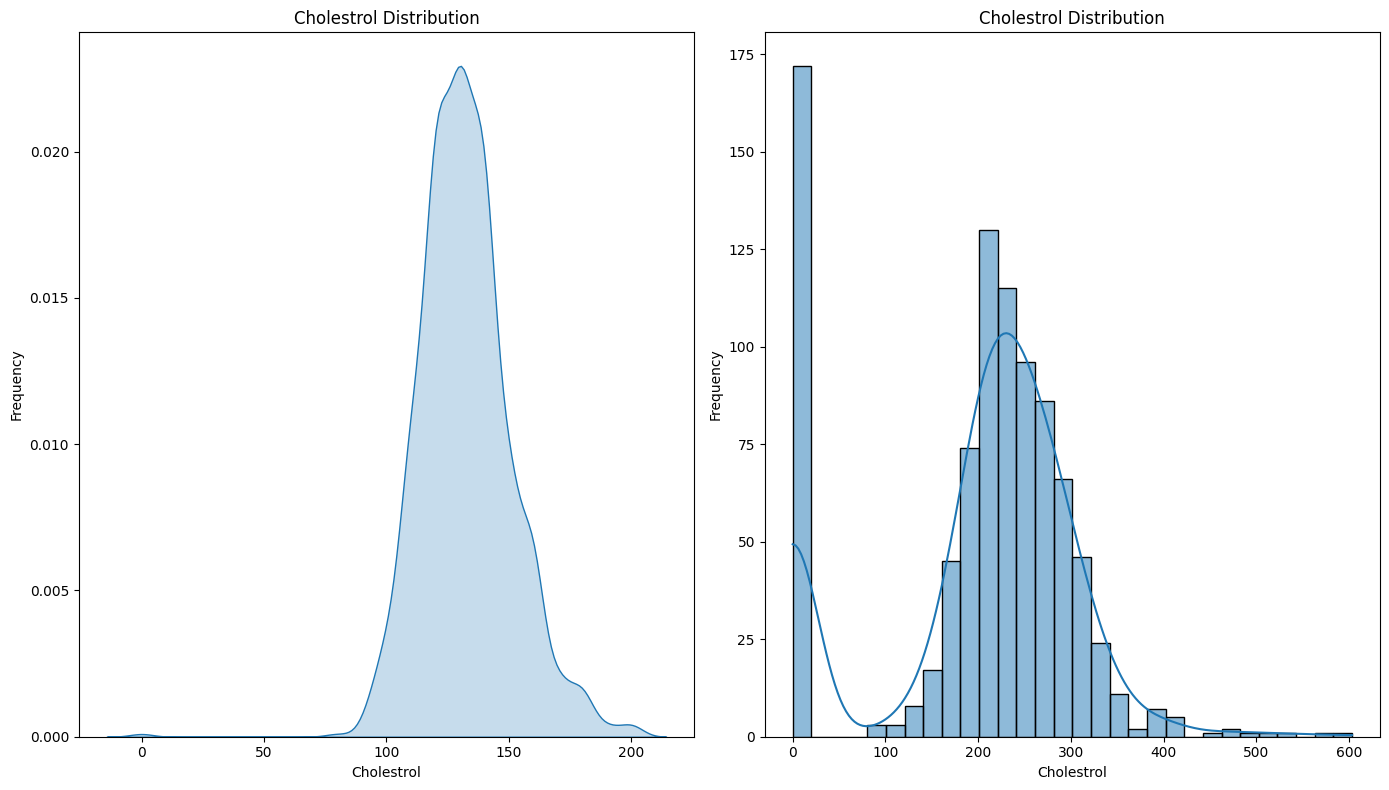

In [15]:
figure(figsize=(14,8))
subplot(1,2,1)
kdeplot(data['RestingBP'],fill=True)
title('Cholestrol Distribution')
xlabel('Cholestrol')
ylabel('Frequency')
subplot(1,2,2)
histplot(data['Cholesterol'],kde=True,bins=30)
title('Cholestrol Distribution')
xlabel('Cholestrol')
ylabel('Frequency')
tight_layout()
show()

In [16]:
object = data.select_dtypes(include='object')
numerical = data.select_dtypes(exclude='object')
for i in object.columns:
    data[i] = LabelEncoder().fit_transform(data[i])
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [21]:
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier
from sklearn.metrics import precision_score,f1_score,accuracy_score,confusion_matrix,classification_report,precision_recall_curve
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)
scaler = RobustScaler()
col = ['Age','RestingBP','Cholesterol','MaxHR']
X_train[col] = scaler.fit_transform(X_train[col])
X_test[col] = scaler.fit_transform(X_test[col])
model = RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=42,max_depth=15,min_samples_leaf=5)
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       random_state=42)

In [22]:
y_pred = model.predict(X_test)
print('Classification Report:',classification_report(y_test,y_pred))
print('Confusion Matrix:',confusion_matrix(y_test,y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.82      0.87      0.84       112
           1       0.90      0.87      0.88       164

    accuracy                           0.87       276
   macro avg       0.86      0.87      0.86       276
weighted avg       0.87      0.87      0.87       276

Confusion Matrix: [[ 97  15]
 [ 22 142]]


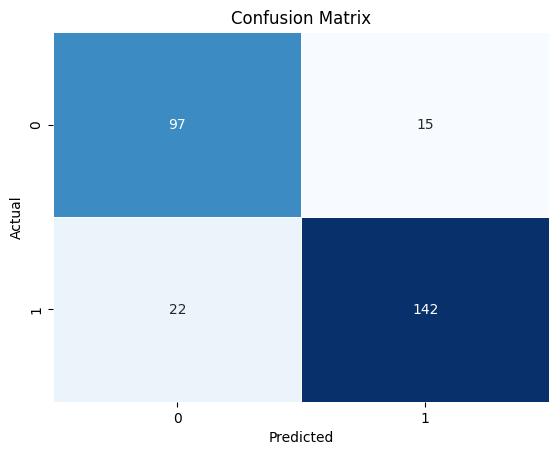

In [23]:
heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues',linewidths=.5,cbar=False)
title('Confusion Matrix')
xlabel('Predicted')
ylabel('Actual')
show()

In [24]:
print('Training Accuracy:',f1_score(y_train,model.predict(X_train)))
print('Testing Accuracy:',f1_score(y_test,y_pred))

Training Accuracy: 0.9180790960451978
Testing Accuracy: 0.8847352024922118


In [25]:
from sklearn.ensemble import *
estimator = DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_split=10,min_samples_leaf=5)
model1 = BaggingClassifier(estimator=estimator,n_estimators=100,random_state=42)
model1.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                   max_depth=15,
                                                   min_samples_leaf=5,
                                                   min_samples_split=10),
                  n_estimators=100, random_state=42)

In [26]:
y_pred = model1.predict(X_test)
print('Training Accuracy:',f1_score(y_train,model1.predict(X_train)))
print('Testing Accuracy:',f1_score(y_test,y_pred))

Training Accuracy: 0.927038626609442
Testing Accuracy: 0.8769716088328076


In [27]:
print('Classification Report:',classification_report(y_test,y_pred))
print('Confusion Matrix:',confusion_matrix(y_test,y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.80      0.88      0.83       112
           1       0.91      0.85      0.88       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276

Confusion Matrix: [[ 98  14]
 [ 25 139]]


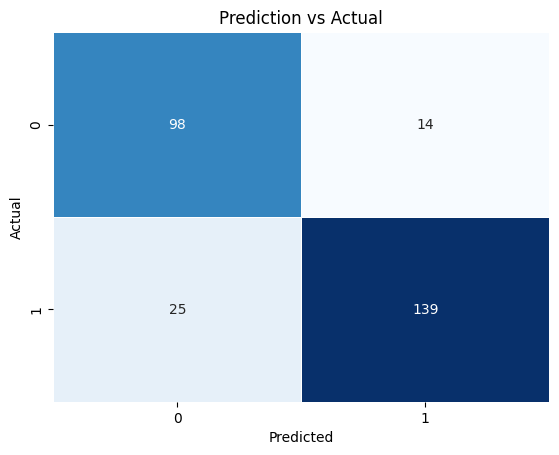

In [28]:
heatmap(confusion_matrix(y_test,y_pred),fmt='d',annot=True,cmap='Blues',linewidths=.5,cbar=False)
title('Prediction vs Actual')
xlabel('Predicted')
ylabel("Actual")
show()

In [29]:
from sklearn.metrics import precision_recall_curve,recall_score
print('F1 Score:',f1_score(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred))
print('Precision Recall Curve:',precision_recall_curve(y_test,y_pred))

F1 Score: 0.8769716088328076
Accuracy Score: 0.8586956521739131
Precision Score: 0.9084967320261438
Recall Score: 0.8475609756097561
Precision Recall Curve: (array([0.5942029 , 0.90849673, 1.        ]), array([1.        , 0.84756098, 0.        ]), array([0, 1]))


In [30]:
svm = SVC(C=0.1,gamma='scale',kernel='rbf')
svm.fit(X_train,y_train)

SVC(C=0.1)

In [31]:
y_pred = svm.predict(X_test)
print('F1 Score:',f1_score(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred))
print('Precision Recall Curve:',precision_recall_curve(y_test,y_pred))

F1 Score: 0.9012345679012346
Accuracy Score: 0.8840579710144928
Precision Score: 0.9125
Recall Score: 0.8902439024390244
Precision Recall Curve: (array([0.5942029, 0.9125   , 1.       ]), array([1.       , 0.8902439, 0.       ]), array([0, 1]))


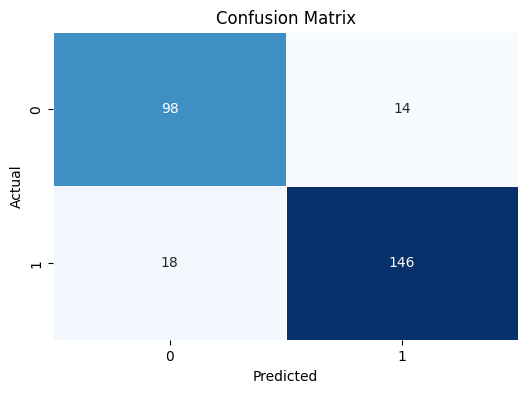

In [32]:
svc_acc = accuracy_score(y_test, y_pred)
svc_per = precision_score(y_test, y_pred)
svc_rec = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
figure(figsize=(6, 4))
heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
title('Confusion Matrix')
xlabel('Predicted')
ylabel('Actual')
show()

In [34]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [35]:
y_pred = xgb.predict(X_test)
print('F1 Score:',f1_score(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred))
print('Precision Recall Curve:',precision_recall_curve(y_test,y_pred))

F1 Score: 0.8881789137380192
Accuracy Score: 0.8731884057971014
Precision Score: 0.9328859060402684
Recall Score: 0.8475609756097561
Precision Recall Curve: (array([0.5942029 , 0.93288591, 1.        ]), array([1.        , 0.84756098, 0.        ]), array([0, 1]))


In [36]:
print('Classification Report:',classification_report(y_test,y_pred))
print('Confusion Matrix:',confusion_matrix(y_test,y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.80      0.91      0.85       112
           1       0.93      0.85      0.89       164

    accuracy                           0.87       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.87      0.87       276

Confusion Matrix: [[102  10]
 [ 25 139]]


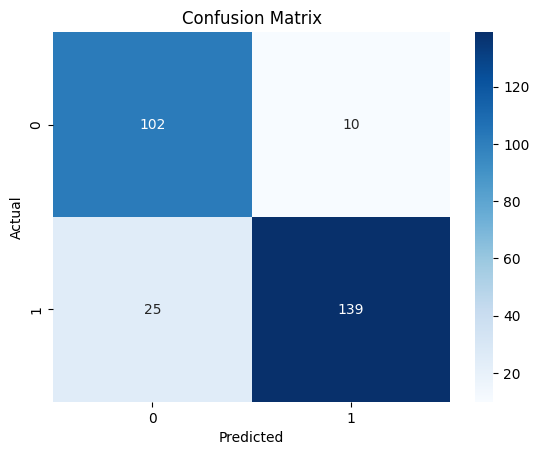

In [37]:
heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
title('Confusion Matrix')
xlabel('Predicted')
ylabel('Actual')
show()

In [38]:
from sklearn.linear_model import LinearRegression,LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [40]:
y_pred = logistic.predict(X_test)
print('F1 Score:',f1_score(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print('Precision Score:',precision_score(y_test,y_pred))
print("Recall Score:",recall_score(y_test,y_pred))
print('Precision Recall Curve:',precision_recall_curve(y_test,y_pred))

F1 Score: 0.8717948717948718
Accuracy Score: 0.855072463768116
Precision Score: 0.918918918918919
Recall Score: 0.8292682926829268
Precision Recall Curve: (array([0.5942029 , 0.91891892, 1.        ]), array([1.        , 0.82926829, 0.        ]), array([0, 1]))


In [41]:
print('Classification Report:',classification_report(y_test,y_pred))
print('Confusion Matrix:',confusion_matrix(y_test,y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.78      0.89      0.83       112
           1       0.92      0.83      0.87       164

    accuracy                           0.86       276
   macro avg       0.85      0.86      0.85       276
weighted avg       0.86      0.86      0.86       276

Confusion Matrix: [[100  12]
 [ 28 136]]


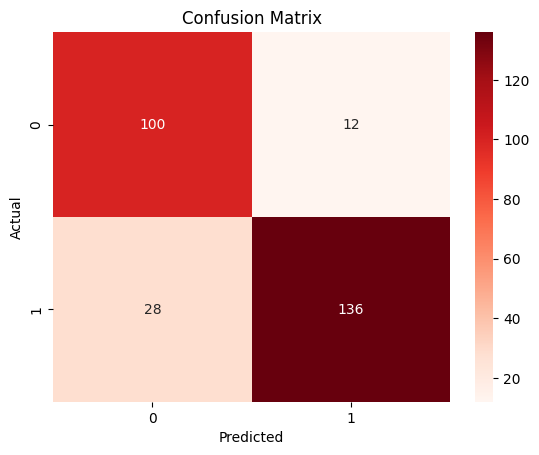

In [43]:
heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Reds')
title('Confusion Matrix')
xlabel('Predicted')
ylabel('Actual')
show()